In [25]:
import numpy as np
import pandas as pd
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elshangadimov
Your Kaggle Key: ··········


100%|██████████| 503M/503M [00:13<00:00, 39.7MB/s]


In [26]:
# For local
# train = pd.read_csv('../cnn_dailymail/train.csv')
# test = pd.read_csv('../cnn_dailymail/test.csv')
# validation = pd.read_csv('../cnn_dailymail/validation.csv')

# For Colab
train = pd.read_csv('/content/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv')
test = pd.read_csv('/content/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv')
validation = pd.read_csv('/content/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv')

In [27]:
train.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [28]:
print(train.shape)
print(test.shape)
print(validation.shape)

(287113, 3)
(11490, 3)
(13368, 3)


In [9]:
def print_row(n: int):
    print(train.iloc[n]['article'])
    print('\n')
    print(train.iloc[n]['highlights'])
print_row(1)

(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, authorities allege that the 45-year-old longtime officer worked with a drug trafficking organization to help plan a murder plot and get guns. A criminal complaint unsealed in U.S. District Court in New Jersey Tuesday accuses Mata, also known as "The Milk Man," of using his role as a police officer to help the drug trafficking organization in exchange for money and gifts, including a Rolex watch. In one instance, the complaint alleges, Mata arranged to pay two assassins to kill rival drug dealers. The killers would pose as cops, pulling over their targets before shooting them, according to the complaint. "Ultimately, the (organization) decided not to move forward with the murder plot, but Mata still received a payment for setting up the meetings," federal prosecutors said in a statement. The complain

In [10]:
train['words_in_highlights'] = train['highlights'].apply(lambda x: len(x.split()))
train['words_in_article'] = train['article'].apply(lambda x: len(x.split()))

In [11]:
import matplotlib.pyplot as plt

In [12]:
train.head()

,id,article,highlights,words_in_highlights,words_in_article
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",37,198
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,38,392
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",69,808
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,53,531
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,67,580


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40e5bd3250>,
      dtype=object)

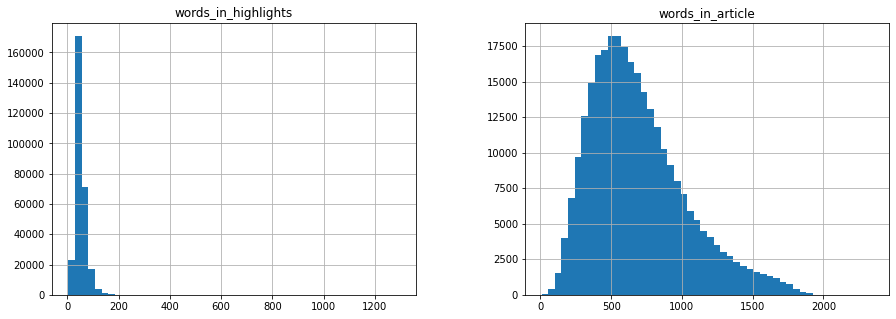

In [13]:
train[['words_in_highlights', 'words_in_article']].hist(bins=50, figsize=(15, 5))

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def clean_from_stopwords(text: str):
    return ' '.join([word for word in text.split() if word not in stopwords])

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenize(text: str):
    return word_tokenize(text)

def lemmatiser(text: str):
    wordnet_lemmatizer = WordNetLemmatizer()
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
train['clean_article'] = train['article'].apply(lambda x: lemmatiser( clean_from_stopwords( tokenize( remove_punctuation(x)))) )

In [19]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

In [ ]:
preprocess_text(train.iloc[1]['article'])

In [21]:
train['clean_article'] = train['article'].apply(lambda x: preprocess_text(x) )

KeyboardInterrupt: ignored

In [30]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')
# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# New stop word list
stop_words = [word for word in stop if word not in excluding]
snow = SnowballStemmer('english')
def text_cleansing(sent): 
    
    # Check if the sentence is a missing value
    if isinstance(sent, str) == False:
        sent = ""
    filtered_sentence=[]
    sent = sent.lower() # Lowercase 
    sent = sent.strip() # Remove leading/trailing whitespace
    sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
    sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
    for w in word_tokenize(sent):
        # We are applying some custom filtering here, feel free to try different things
        # Check if it is not numeric and its length>2 and not in stop words
        if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
            # Stem and add to filtered list
            filtered_sentence.append(snow.stem(w))
    final_string = " ".join(filtered_sentence) #final string of cleaned words
        
    return final_string
train['clean_highlights'] = train['highlights'].apply(lambda x: text_cleansing(x))
train.head(10)

In [34]:
train.tail()

,id,article,highlights,clean_highlights
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...,chelsea clinton said question run offic longer...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ...",vanilla ice real name robert van winkl arrest ...
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...,america lethal sniper made comment interview t...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...,swarm one million cross border egypt israel lo...
287112,ffffd563a96104f5cf4493cfa701a65f31b06abf,(CNN)Former Florida Gov. Jeb Bush has decided ...,Other 2016 hopefuls maintain that Bush's annou...,hope maintain bush announc would n't prevent r...


In [35]:
train['clean_article'] = train['article'].apply(lambda x: text_cleansing(x))
train.head(10)

,id,article,highlights,clean_highlights,clean_article
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",bishop john folda north dakota take time diagn...,associ press publish 14:11 est octob updat 15:...
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,crimin complaint cop use role help cocain traf...,cnn ralph mata intern affair lieuten miami-dad...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",craig eccleston-todd drunk least three pint dr...,drunk driver kill young woman head-on crash ch...
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,nina dos santo say europ must readi accept san...,cnn breezi sweep pen presid vladimir putin wro...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,fleetwood top leagu one 2-0 win scunthorp pete...,fleetwood team still record sky bet leagu one ...
5,0004306354494f090ee2d7bc5ddbf80b63e80de6,He's been accused of making many a fashion fau...,Prime Minister and his family are enjoying an ...,prime minist famili enjoy easter break lanzaro...,accus make mani fashion faux pas holiday prime...
6,0005d61497d21ff37a17751829bd7e3b6e4a7c5c,By . Daily Mail Reporter . PUBLISHED: . 01:15 ...,NBA star calls for black and Hispanic communit...,nba star call black hispan communiti get test ...,daili mail report publish 01:15 est novemb upd...
7,0006021f772fad0aa78a977ce4a31b3faa6e6fe5,By . Daily Mail Reporter . This is the moment ...,London Midland service had been pulling into T...,london midland servic pull telford station shr...,daili mail report moment train announc stun pa...
8,00083697263e215e5e7eda753070f08aa374dd45,There are a number of job descriptions waiting...,Tony Pulis believes Saido Berahino should look...,toni puli believ saido berahino look darren fl...,number job descript wait darren fletcher settl...
9,000940f2bb357ac04a236a232156d8b9b18d1667,"Canberra, Australia (CNN) -- At first glance, ...",Black box data from Flight 370 could be analyz...,black box data flight could analyz laboratori ...,canberra australia cnn first glanc n't look li...


In [36]:
train.to_csv('train_clean.csv')